In [2]:
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류 알고리즘
import pandas as pd

# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# monitored label=1 / unmonitored label=-1로 한 dataset 불러오기
#==
#binary_unmon=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/unmon_labelfix.csv")

In [ ]:
#binary_mon.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,y,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1300.0,121.0,21.0,9.0,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421.0,140.138067,1.0,NaN,NaN,NaN,NaN
1,438.0,80.0,22.0,8.0,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518.0,50.984252,1.0,NaN,NaN,NaN,NaN
2,1240.0,118.0,23.0,7.0,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358.0,122.232223,1.0,NaN,NaN,NaN,NaN
3,1324.0,122.0,21.0,9.0,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446.0,108.233533,1.0,NaN,NaN,NaN,NaN
4,1291.0,115.0,22.0,8.0,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406.0,132.142857,1.0,NaN,NaN,NaN,NaN


In [ ]:
#binary_mon = binary_mon.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1)


In [ ]:
#binary_mon.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,y
0,1300.0,121.0,21.0,9.0,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421.0,140.138067,1.0
1,438.0,80.0,22.0,8.0,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518.0,50.984252,1.0
2,1240.0,118.0,23.0,7.0,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358.0,122.232223,1.0
3,1324.0,122.0,21.0,9.0,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446.0,108.233533,1.0
4,1291.0,115.0,22.0,8.0,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406.0,132.142857,1.0


In [ ]:
#binary_unmon.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,y
0,101,29,17,13,0.223077,0.776923,36.304696,27.053784,73.465347,37.758621,130,23.381295,-1
1,9189,738,18,12,0.074343,0.925657,2845.096286,2885.461055,5053.770595,3846.246612,9927,835.606061,-1
2,285,74,17,13,0.206128,0.793872,100.730751,111.145044,185.996491,156.905405,359,20.157215,-1
3,9407,541,21,9,0.054383,0.945617,2855.784563,3120.454082,4992.069735,4668.994455,9948,1084.841876,-1
4,2215,293,27,3,0.116826,0.883174,716.374241,778.715376,1257.969752,1228.269625,2508,46.799776,-1


In [ ]:
# mon,unmon 데이터 병합
#binary = pd.concat([binary_mon, binary_unmon], axis = 0)
#binary.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,y
0,1300.0,121.0,21.0,9.0,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421.0,140.138067,1.0
1,438.0,80.0,22.0,8.0,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518.0,50.984252,1.0
2,1240.0,118.0,23.0,7.0,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358.0,122.232223,1.0
3,1324.0,122.0,21.0,9.0,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446.0,108.233533,1.0
4,1291.0,115.0,22.0,8.0,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406.0,132.142857,1.0


In [5]:
binary_concat=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/binary_concat.csv")
binary_concat.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,y,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,1,NaN,NaN,NaN,NaN
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,1,NaN,NaN,NaN,NaN
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,1,NaN,NaN,NaN,NaN
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,1,NaN,NaN,NaN,NaN
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,1,NaN,NaN,NaN,NaN


In [6]:
binary_concat=binary_concat.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1)
binary_concat.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,y
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,1
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,1
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,1
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,1
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,1


In [7]:
# 정답값 아닌 애들 분리
X= binary_concat.drop('y', axis=1)
# 목표변수 분리(정답값. 어느 클래스 label에 해당하는지 해당 열)
y = binary_concat['y']

In [8]:
# train, test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 1)

# 데이터 스케일링(normalize data)

# 표준 스케일러(평균 0, 분산 1)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [9]:
clf2 = RandomForestClassifier(n_estimators=100,  random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)

accuracy_score :  0.7905172413793103


In [ ]:
# GridSearch로 최적의 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 150, 200],
          'max_depth' : [12,25,38],
          'min_samples_leaf' : [1,4,7],
          'min_samples_split' : [2,5,8],
          #'criterion' : ['gini', 'entropy']
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid = GridSearchCV(rf_clf, params, refit = True, verbose = 3, cv=5)
grid.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.819 total time=   3.7s
[CV 2/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.823 total time=   3.7s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.818 total time=   5.1s
[CV 4/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.825 total time=   5.8s
[CV 5/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.816 total time=   3.7s
[CV 1/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.819 total time=   5.7s
[CV 2/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.824 total time=   8.8s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.819 total time=  

In [ ]:
# 위의 결과로 나온 최적 하이퍼 파라미터로 테스트 세트 데이터에서 예측 성능을 측정

y_pred = grid.predict(X_test)
print('예측 정확도: {:.4f}'.format(grid.best_score_))
print('test 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('오차 행렬')
print(confusion_matrix( y_test, y_pred))
print(classification_report(y_test, y_pred))

예측 정확도: 0.8437
test 정확도: 0.7950
오차 행렬
[[1338  594]
 [ 595 3273]]
              precision    recall  f1-score   support

          -1       0.69      0.69      0.69      1932
           1       0.85      0.85      0.85      3868

    accuracy                           0.80      5800
   macro avg       0.77      0.77      0.77      5800
weighted avg       0.80      0.80      0.80      5800



In [ ]:
# feature names 뽑기(header 제외)
a=binary_concat.drop(['y'], axis=1)
column_headers=list(a.columns.values)

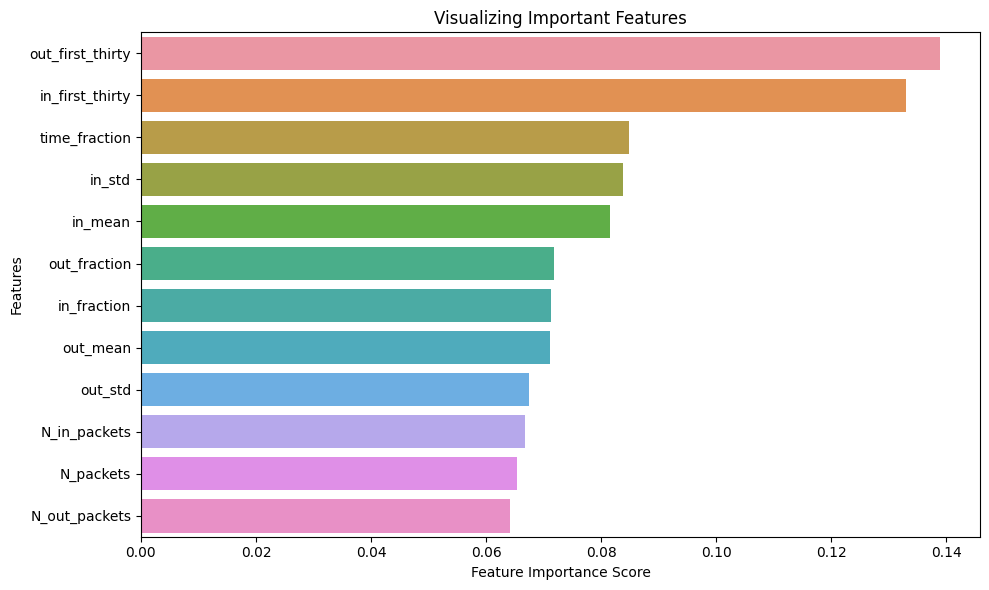

In [ ]:
# 5. Report the feature rankings with importance scores using the bar plot using barplot provided by seaborn library.

import seaborn as sns
import matplotlib.pyplot as plt

best_params=grid.best_params_
best_rf_clf = RandomForestClassifier(**best_params)
best_rf_clf.fit(X_train, y_train)
#accuracy = best_rf_clf.score(X_test, y_test)
#print("모델 재훈련 테스트 정확도:", accuracy)

feature_imp = pd.Series(best_rf_clf.feature_importances_, index=column_headers).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()